astrobiologija - pca analiza

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [2]:
path_dints = 'jw02783002001_03103_00001-seg001_mirimage_x1dints.fits'
hduld = fits.open(path_dints)

print(hduld.info())

Filename: jw02783002001_03103_00001-seg001_mirimage_x1dints.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     261   ()      
  1  INT_TIMES     1 BinTableHDU     24   10R x 7C   [J, D, D, D, D, D, D]   
  2  EXTRACT1D     1 BinTableHDU    116   10R x 27C   [J, 388D, 388D, 388D, 388D, 388D, 388D, 388D, 388D, 388D, 388D, 388D, 388J, 388D, 388D, 388D, 388D, 388D, 388D, J, J, D, D, D, D, D, D]   
  3  ASDF          1 BinTableHDU     11   1R x 1C   [43646B]   
None


In [3]:
data = hduld["EXTRACT1D"].data
print(data.columns.names)

wavelength = data['WAVELENGTH']
flux = data['FLUX']
flux_err = data['FLUX_ERROR']
tdb_beg = data['TDB-BEG']
tdb_end = data['TDB-END']
npixels = data['NPIXELS']
int_num = data['INT_NUM']

['INT_NUM', 'WAVELENGTH', 'FLUX', 'FLUX_ERROR', 'FLUX_VAR_POISSON', 'FLUX_VAR_RNOISE', 'FLUX_VAR_FLAT', 'SURF_BRIGHT', 'SB_ERROR', 'SB_VAR_POISSON', 'SB_VAR_RNOISE', 'SB_VAR_FLAT', 'DQ', 'BACKGROUND', 'BKGD_ERROR', 'BKGD_VAR_POISSON', 'BKGD_VAR_RNOISE', 'BKGD_VAR_FLAT', 'NPIXELS', 'N_ALONGDISP', 'SEGMENT', 'MJD-BEG', 'MJD-AVG', 'MJD-END', 'TDB-BEG', 'TDB-MID', 'TDB-END']


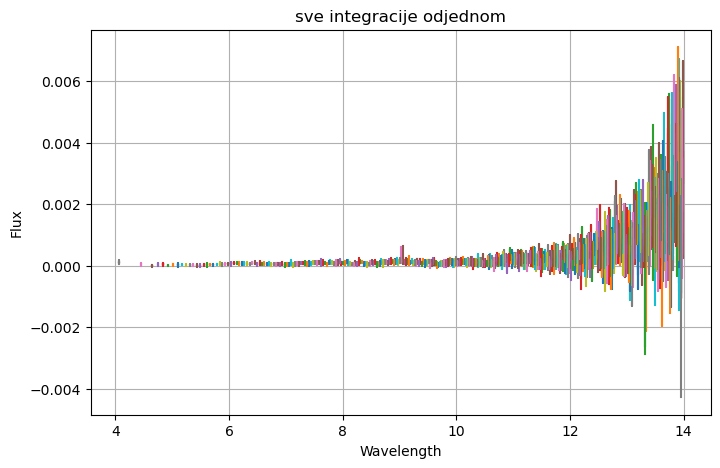

In [4]:
plt.figure(figsize=(8,5))
plt.plot(wavelength,flux)
plt.title('sve integracije odjednom')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.grid()
plt.show()

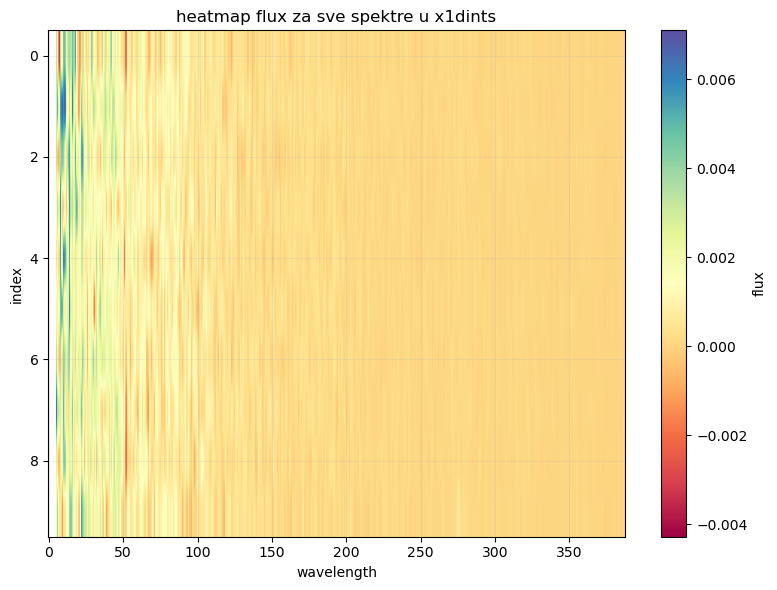

In [5]:
plt.figure(figsize=(8, 6))

plt.imshow(flux,cmap ='Spectral',aspect='auto',)

plt.colorbar(label='flux')
plt.xlabel('wavelength')
plt.ylabel('index')

plt.title('heatmap flux za sve spektre u x1dints')
plt.tight_layout()
plt.grid(alpha = 0.2)
plt.show()


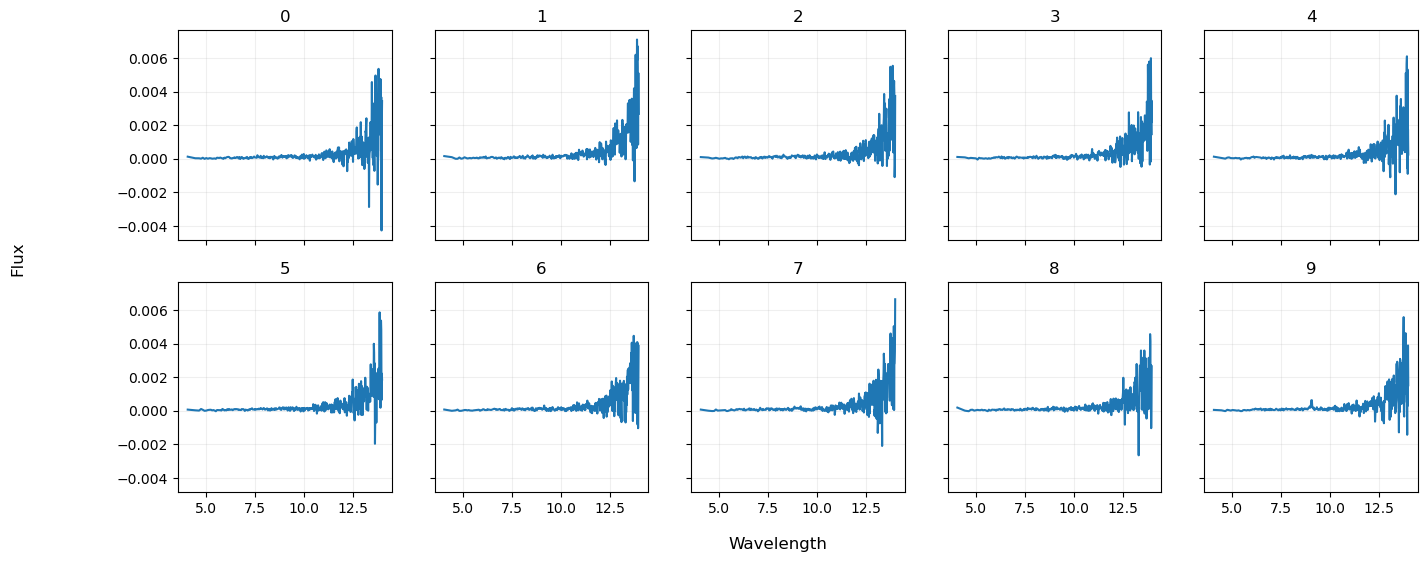

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6), sharex=True, sharey=True)

axes = axes.flatten()

wvlngth = data['WAVELENGTH']
flx_list = data['FLUX']

for i in range(len(wvlngth)):
    axes[i].plot(wvlngth[i], flx_list[i])
    axes[i].grid(alpha=0.2)
    axes[i].set_title(i)

fig.supxlabel('Wavelength')
fig.supylabel('Flux')
plt.show()


In [7]:
wavelength = data['WAVELENGTH']
flux = data['FLUX']

print(flux.shape)
print(wavelength.shape)
# 10 lista sa 388 vrendnoscu na svakoj

(10, 388)
(10, 388)


In [26]:
from sklearn.preprocessing import StandardScaler

X = flux
Y = wavelength

In [43]:
#provera vrednosti podataka
std_per_wavelength = np.std(X, axis=0)
print(np.where(std_per_wavelength == 0))

np.isnan(X).sum(), np.isinf(X).sum()

for i in range(10):
    print(X[i][5:].min(),X[i][5:].max())

(array([], dtype=int64),)
-0.004282112175354265 0.005353869397248288
-0.0013522969992292003 0.0071006520969880615
-0.0011020519912226371 0.005536013471244188
-0.0004948276955572071 0.005989009164629078
-0.002125548889072955 0.006100369344149632
-0.001976917237324476 0.005859965582628891
-0.001048440831616612 0.004461440314168574
-0.0021065899350021376 0.006640757362408274
-0.0026635226898872218 0.004561542340135745
-0.0014382578903856438 0.005575613118452606


In [60]:
#ciscenje NaN vrednosti

mask = ~np.isnan(X).any(axis=0)
print(mask.shape)

#print(np.isnan(X[2])) #- prvih pet vrednosti svake liste je NaN

X_clean = X[:, 5:]
Y_clean = Y[:,5:] # izbacujemo talasne duzine gde su fluksevi nan

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)
Y_scaled = scaler.fit_transform(Y_clean)

(388,)


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

In [15]:
import numpy as np

cum_var = np.cumsum(pca.explained_variance_ratio_)
print(cum_var)

[0.13713303 0.2703412  0.38969048 0.50191626 0.61019049 0.71259991]


In [61]:
pca_vals = np.array([0.13713303, 0.2703412, 0.38969048,
                      0.50191626, 0.61019049, 0.71259991])

lam_min = Y_clean.min()
lam_max = Y_clean.max()

bin_centers = lam_min + pca_vals * (lam_max - lam_min)

print('znacajne talasne duzine')
print(bin_centers) # u mikrometrima

znacajne talasne duzine
[ 5.42360072  6.74471085  7.92837356  9.04138798 10.11521237 11.13087172]


In [45]:
bin_edges = np.zeros(len(bin_centers) + 1)

bin_edges[1:-1] = 0.5 * (bin_centers[1:] + bin_centers[:-1])
bin_edges[0] = lam_min
bin_edges[-1] = lam_max

print('ivice binova:')
print(bin_edges)

ivice binova:
[ 4.06356525  6.08415578  7.3365422   8.48488077  9.57830018 10.62304205
 13.98120117]


In [46]:
def rebin_spectrum(wavelength, flux, bin_edges):
    binned_flux = []

    for i in range(len(bin_edges) - 1):
        left = bin_edges[i]
        right = bin_edges[i + 1]

        mask = (wavelength >= left) & (wavelength < right)

        binned_flux.append(np.mean(flux[mask]))

    return np.array(binned_flux)

In [58]:
binned_flux = rebin_spectrum(Y_clean[0], X_clean[0], bin_edges)

In [59]:
print(binned)

[2.83614416e-05 4.91815790e-05 8.16531600e-05 1.11779555e-04
 9.93159508e-05 6.72629836e-04]


In [68]:
tenzor = [None]*10

for i in range(10):
    binned_flux = rebin_spectrum(Y_clean[i], X_clean[i], bin_edges)
    tenzor[i] = list(zip(binned_flux, bin_edges))
    #X_bin.append(rebin_spectrum(Y_clean[i],X_clean[i],bin_edges))

In [69]:
print(tenzor)

[[(2.8361441608562782e-05, 4.063565254211426), (4.918157902833656e-05, 6.0841557836965805), (8.165316002622414e-05, 7.336542202393341), (0.00011177955476847179, 8.48488076873889), (9.931595084963326e-05, 9.57830017824948), (0.0006726298356770866, 10.623042045501709)], [(4.3366105285596496e-05, 4.063565254211426), (4.965206179815184e-05, 6.0841557836965805), (7.825429489082275e-05, 7.336542202393341), (0.00010399152110608512, 8.48488076873889), (0.00012869770627376041, 9.57830017824948), (0.0009808591582606441, 10.623042045501709)], [(3.018908591472013e-05, 4.063565254211426), (6.215870069426349e-05, 6.0841557836965805), (0.00010039402087610739, 7.336542202393341), (0.00011533935219260039, 8.48488076873889), (0.00010758850639258708, 9.57830017824948), (0.0007905431523006453, 10.623042045501709)], [(2.9264688872783672e-05, 4.063565254211426), (6.443801156655751e-05, 6.0841557836965805), (6.849245138207405e-05, 7.336542202393341), (9.004049155938683e-05, 8.48488076873889), (0.000107511274

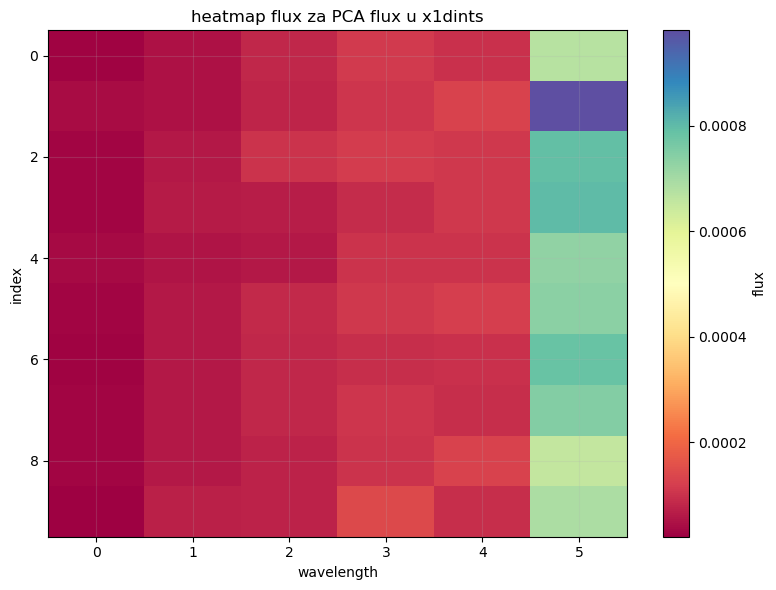

In [75]:
plt.figure(figsize=(8, 6))
tenzor_np = np.array(tenzor)
plt.imshow(tenzor_np[:, :, 0],cmap ='Spectral',aspect='auto',)

plt.colorbar(label='flux')
plt.xlabel('wavelength')
plt.ylabel('index')

plt.title('heatmap flux za PCA flux u x1dints')
plt.tight_layout()
plt.grid(alpha = 0.2)
plt.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
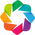

In [78]:
import QhX

In [85]:
from QhX.algorithms.wavelets.wwtz import *
from QhX import plots
from QhX.utils import *

In [99]:
tt = tenzor_np[:, :, 1] #pca talasne duzine
#print(tt)
yy = tenzor_np[:, :, 0] #pca znacajne flux vrednosti 
#print(yy)

In [100]:
wwz_matrix, corr, extent = hybrid2d(tt, yy, 10, 6, minfq=lam_min,maxfq=lam_max)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.871
largest tau window is  [0. 0. 0. 0. 0. 0.]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [92]:
plots.plt_freq_heatmap(corr, extent)

NameError: name 'corr' is not defined